#   -------- Machine Learning Predictions on Global Terrorism Database --------

In [2]:
import os
os.getcwd()
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree , metrics, preprocessing
import os
%matplotlib inline 
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
#import sklearn
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
import codecs
from subprocess import check_output

In [3]:
os.getcwd()

'C:\\Users\\My computer'

In [4]:
os.chdir("C:\\Users\\My computer\\Downloads\\globalterror")

In [5]:
cr = pd.read_csv( "globalterrorismdb_0718dist.csv",encoding="LATIN-1")
cr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
newdf=cr[["eventid","iyear","iday","success","attacktype1","targtype1","natlty1","weaptype1","nkill","extended","country","region",
          "latitude","longitude","specificity","vicinity","crit1","suicide","nperps","weaptype1"]]

In [7]:
terror = cr.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=False)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']

terror.head(3)


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [8]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

In [9]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


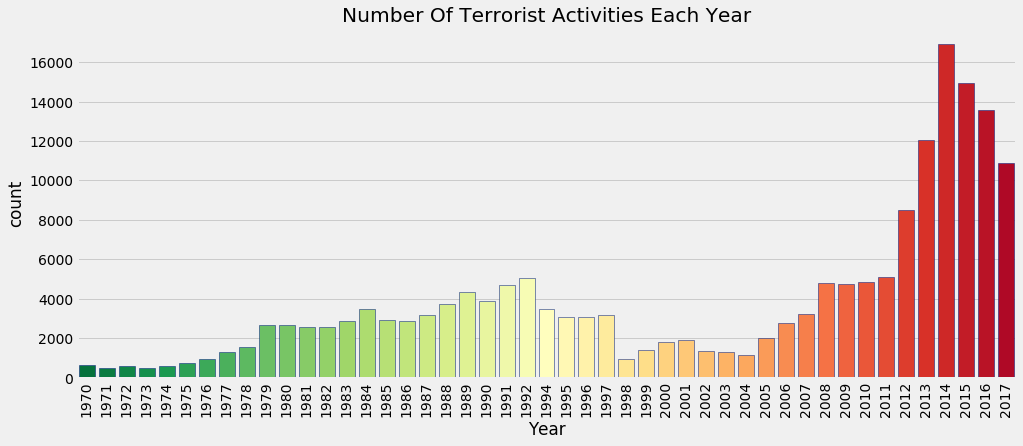

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',1),dodge=False,saturation=1.75)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

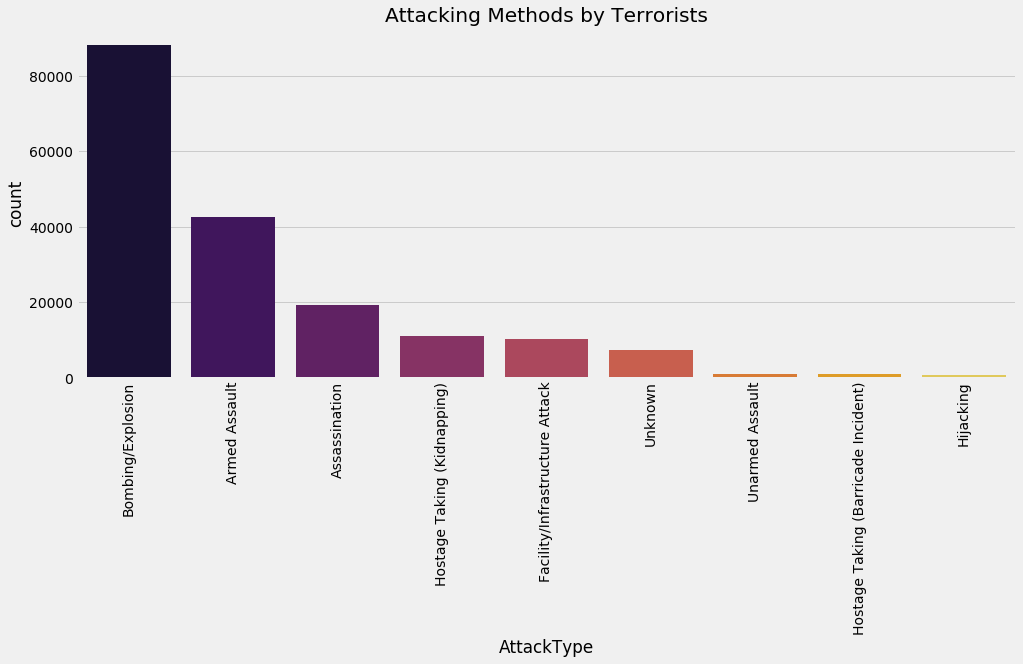

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

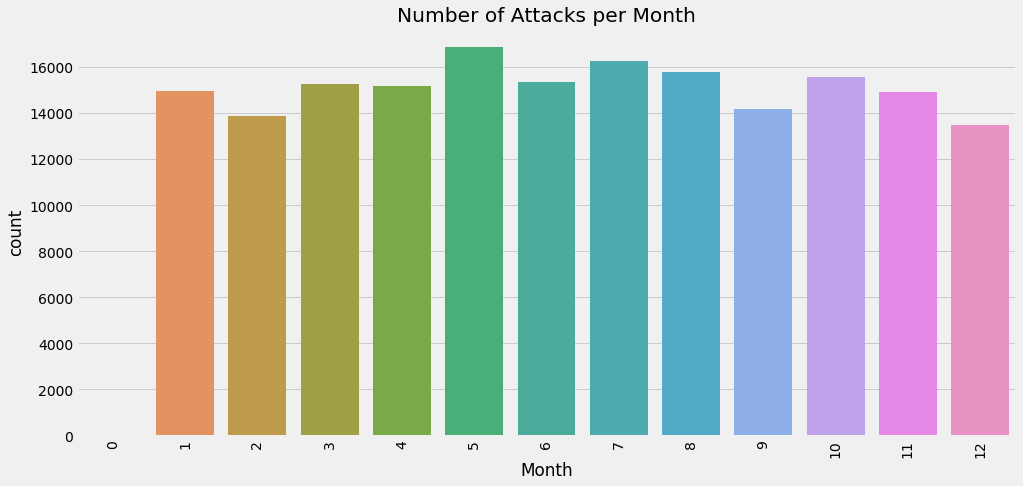

In [12]:
plt.subplots(figsize=(15,7))
sns.countplot('Month',data=terror)
plt.xticks(rotation=90)
plt.title('Number of Attacks per Month')
plt.show()

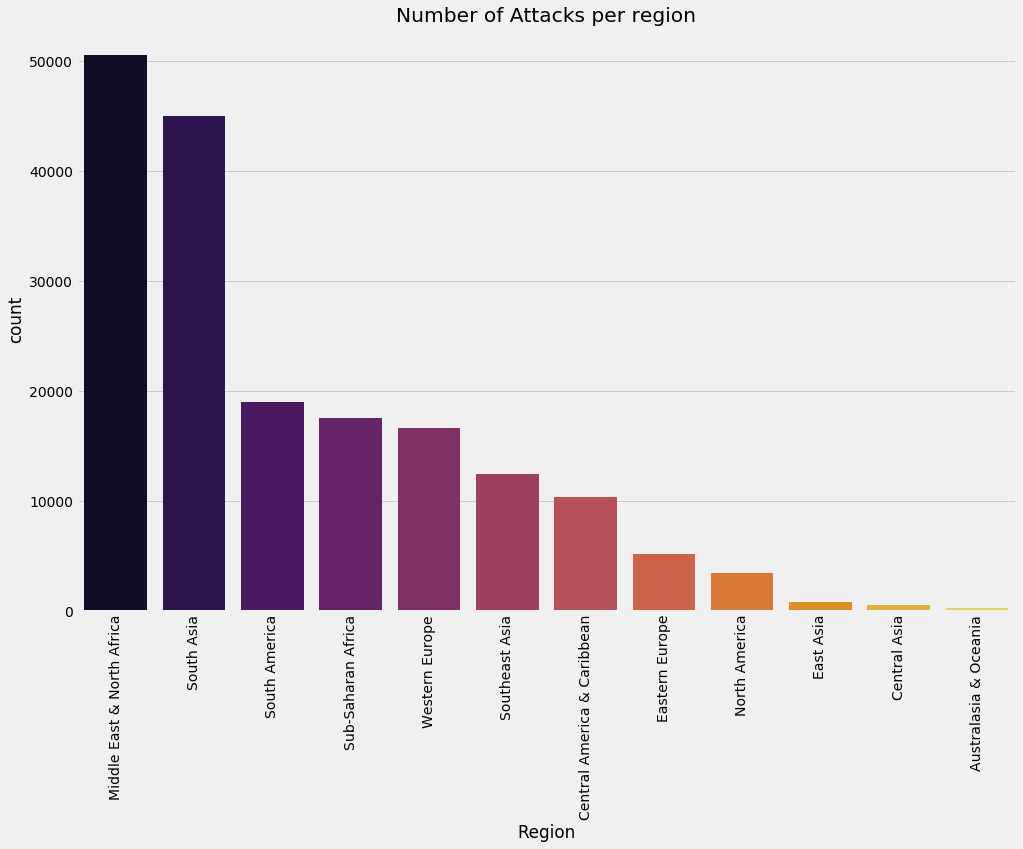

In [13]:
plt.subplots(figsize=(15,10))
sns.countplot('Region',data=terror,palette='inferno',order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Attacks per region')
plt.show()

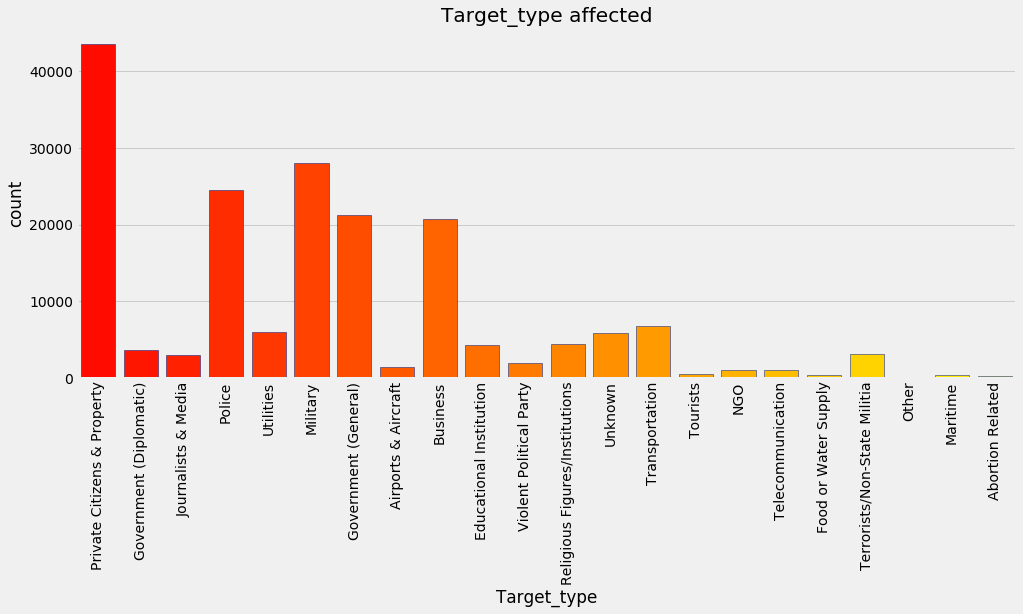

In [14]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_type',data=terror,palette='autumn',edgecolor=sns.color_palette('dark',1),dodge=False,saturation=1.75)
plt.xticks(rotation=90)
plt.title('Target_type affected')
plt.show()

In [9]:
ss=newdf.dropna()

In [10]:
ss.dtypes

eventid          int64
iyear            int64
iday             int64
success          int64
attacktype1      int64
targtype1        int64
natlty1        float64
weaptype1        int64
nkill          float64
extended         int64
country          int64
region           int64
latitude       float64
longitude      float64
specificity    float64
vicinity         int64
crit1            int64
suicide          int64
nperps         float64
weaptype1        int64
dtype: object

# Predicting Success 

1    90166
0    13874
Name: success, dtype: int64

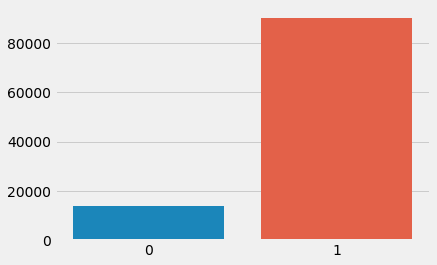

In [11]:
y = ss.success.value_counts()
sns.barplot(y.index, y.values)
y

In [12]:
X = ss.drop(['success'], axis=1, inplace=False)  
X

,eventid,iyear,iday,attacktype1,targtype1,natlty1,weaptype1,nkill,extended,country,region,latitude,longitude,specificity,vicinity,crit1,suicide,nperps,weaptype1
1,197000000002,1970,0,6,7,21.0,13,0.0,0,130,1,19.371887,-99.086624,1.0,0,1,0,7.0,13
5,197001010002,1970,1,2,3,217.0,5,0.0,0,217,1,37.005105,-89.176269,1.0,0,1,0,-99.0,5
6,197001020001,1970,2,1,3,218.0,5,0.0,0,218,3,-34.891151,-56.187214,1.0,0,1,0,3.0,5
7,197001020002,1970,2,3,21,217.0,6,0.0,0,217,1,37.791927,-122.225906,1.0,0,1,0,-99.0,6
8,197001020003,1970,2,7,4,217.0,8,0.0,0,217,1,43.076592,-89.412488,1.0,0,1,0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,31,2,4,182.0,5,1.0,0,182,11,2.359673,45.385034,2.0,0,1,0,-99.0,5
181687,201712310029,2017,31,3,4,167.0,6,2.0,0,200,10,35.407278,35.942679,1.0,1,1,0,-99.0,6
181688,201712310030,2017,31,7,14,160.0,8,0.0,0,160,5,6.900742,124.437908,2.0,0,1,0,-99.0,8
181689,201712310031,2017,31,3,2,92.0,6,0.0,0,92,6,24.798346,93.940430,1.0,0,1,0,-99.0,6


In [13]:
Y=ss['success']
Y

1         1
5         1
6         0
7         1
8         1
         ..
181686    1
181687    1
181688    1
181689    0
181690    0
Name: success, Length: 104040, dtype: int64

## Random Forest

In [23]:
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [24]:
clf = RandomForestClassifier(n_estimators = 500, random_state = 42)

In [25]:
# Instantiate model with 1000 decision trees
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
clf.fit(X_train_RF, y_train_RF);

# State is string and we want discreet integer values

In [26]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train_RF.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [27]:
feature_importances

,importance
targtype1,0.149368
eventid,0.121475
attacktype1,0.109331
nkill,0.107742
latitude,0.102282
longitude,0.100990
iday,0.081915
iyear,0.044435
natlty1,0.031280
country,0.029986


In [28]:
importances = clf.feature_importances_ 

[0.12147509 0.04443463 0.08191508 0.10933102 0.14936798 0.03128041
 0.01850914 0.10774224 0.00455785 0.02998608 0.01378489 0.10228238
 0.10098956 0.01668074 0.00820385 0.00152733 0.01213548 0.02789413
 0.01790212]


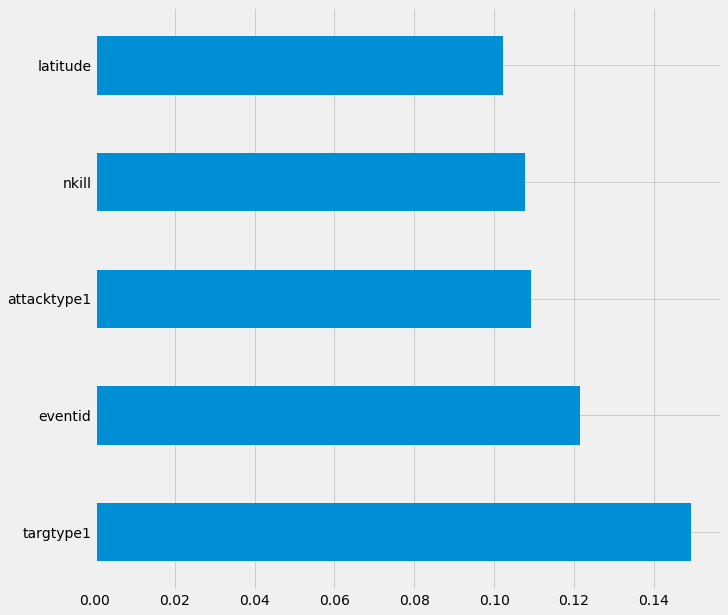

In [26]:

# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train_RF.columns)
feat_importances = feat_importances.nlargest(5)
feat_importances.plot(kind='barh' , figsize=(10,10)) 

[0.12147509 0.04443463 0.08191508 0.10933102 0.14936798 0.03128041
 0.01850914 0.10774224 0.00455785 0.02998608 0.01378489 0.10228238
 0.10098956 0.01668074 0.00820385 0.00152733 0.01213548 0.02789413
 0.01790212]


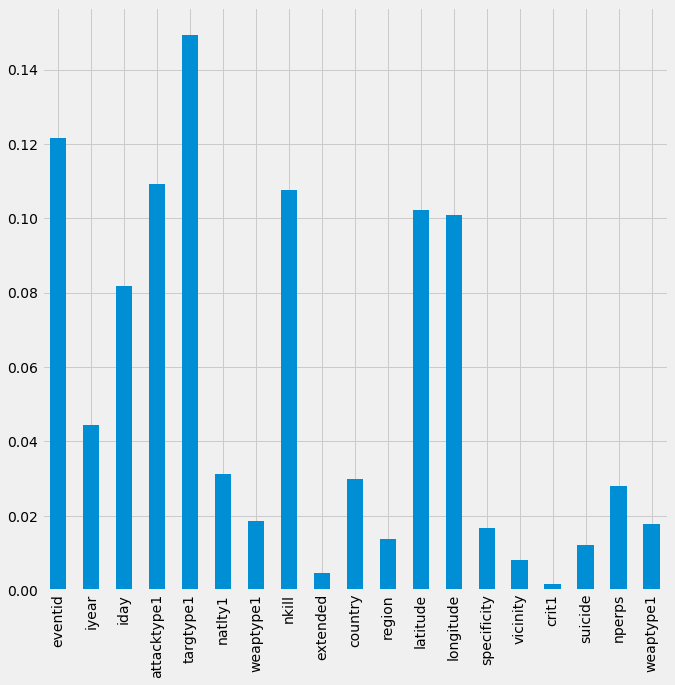

In [27]:
# Get Feature Importance from the classifier
feature_importance = clf.feature_importances_
print (clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X_train_RF.columns)
feat_importances = feat_importances
feat_importances.plot(kind='bar' , figsize=(10,10)) 

In [29]:
indices = np.argsort(importances)[::-1]

In [30]:
from sklearn.tree import export_graphviz
estimator = clf.estimators_[1] # number of trees to visualise
# Export as dot file
export_graphviz(estimator, out_file='RandomForest.dot', 
                feature_names = X_train_RF.columns,
                #class_names = y_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# file will be saved in current working directory

In [31]:
for f in range(X.shape[1]):
    if importances[indices[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        print ("feature name: ", X.columns[indices[f]])

1. feature 4 (0.149368)
feature name:  targtype1
2. feature 0 (0.121475)
feature name:  eventid
3. feature 3 (0.109331)
feature name:  attacktype1
4. feature 7 (0.107742)
feature name:  nkill
5. feature 11 (0.102282)
feature name:  latitude
6. feature 12 (0.100990)
feature name:  longitude
7. feature 2 (0.081915)
feature name:  iday
8. feature 1 (0.044435)
feature name:  iyear
9. feature 5 (0.031280)
feature name:  natlty1
10. feature 9 (0.029986)
feature name:  country
11. feature 17 (0.027894)
feature name:  nperps
12. feature 6 (0.018509)
feature name:  weaptype1
13. feature 18 (0.017902)
feature name:  weaptype1
14. feature 13 (0.016681)
feature name:  specificity
15. feature 10 (0.013785)
feature name:  region
16. feature 16 (0.012135)
feature name:  suicide
17. feature 14 (0.008204)
feature name:  vicinity
18. feature 8 (0.004558)
feature name:  extended
19. feature 15 (0.001527)
feature name:  crit1


In [32]:
# use the model to make predictions with the test data
y_pred_RF = clf.predict(X_test_RF)

In [33]:
# combining 2 numpy arrays into one pandas dataframe
final_model_predictions_RF = pd.DataFrame({'Actual':y_test_RF, 'predictions':y_pred_RF})

In [34]:
final_model_predictions_RF.head()

,Actual,predictions
135079,1,1
151904,1,1
173677,1,1
169196,1,1
148161,1,1


In [35]:

# how did our model perform?
count_misclassified = (y_test_RF != y_pred_RF).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_RF = metrics.accuracy_score(y_test_RF, y_pred_RF)
print('Accuracy: {:.4f}'.format(accuracy_RF))


Misclassified samples: 2310
Accuracy: 0.9260


In [36]:
y_pred_prob = clf.predict_proba(X_test_RF)  # 2  columns for probability it is creating

In [37]:
y_pred_prob = clf.predict_proba(X_test_RF)[:,1]   # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1

In [38]:
final_model_predictions_RF['Predicted_prob'] = y_pred_prob

In [39]:
final_model_predictions_RF.head()

,Actual,predictions,Predicted_prob
135079,1,1,0.973000
151904,1,1,1.000000
173677,1,1,0.976417
169196,1,1,0.993000
148161,1,1,0.949000


In [40]:
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib 

Using matplotlib backend: Qt5Agg


In [41]:

def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted )
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  # correct 0 is sensitivity and correct is specificity

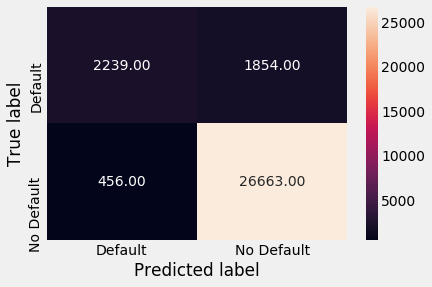

In [41]:
draw_cm( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )   # correct 0 is sensitivity and correct is specificity

In [42]:

accuracy_RF=np.round( metrics.accuracy_score( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions  ),2)*100
accuracy_RF='{:.2f}'.format(accuracy_RF)
print( 'Total Accuracy : ',accuracy_RF )
recall_RF=metrics.recall_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('recall :',recall_RF)
precision_RF=metrics.precision_score(final_model_predictions_RF.Actual, final_model_predictions_RF.predictions )
print('Precision :',precision_RF)

Total Accuracy :  93.00
recall : 0.9831852206939784
Precision : 0.934986148613108


In [43]:
cm1 = metrics.confusion_matrix( final_model_predictions_RF.Actual, final_model_predictions_RF.predictions)

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.55
Specificity :  0.98


In [44]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib 


Using matplotlib backend: Qt5Agg


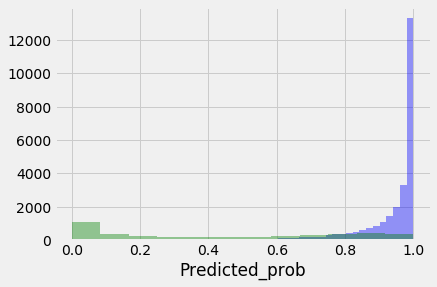

In [45]:
sn.distplot( final_model_predictions_RF[final_model_predictions_RF.Actual == 1]["Predicted_prob"], kde=False, color = 'b' )
sn.distplot( final_model_predictions_RF[final_model_predictions_RF.Actual == 0]["Predicted_prob"], kde=False, color = 'g' )

In [45]:
auc_score = metrics.roc_auc_score( final_model_predictions_RF.Actual, final_model_predictions_RF.Predicted_prob  )
round( float( auc_score ), 2 )

0.93

In [47]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

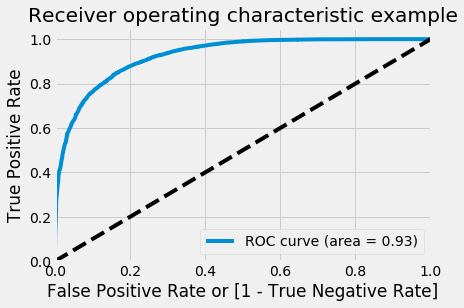

In [48]:
fpr, tpr, thresholds = draw_roc( final_model_predictions_RF.Actual, final_model_predictions_RF.Predicted_prob )

In [49]:
columns=["Accuracy", "recall", "Precision "]

## K-Nearest Neighbors Algorithm
#### .


In [48]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_KNN)

X_train_knn = scaler.transform(X_train_KNN)
X_test_knn = scaler.transform(X_test_KNN)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train_knn, y_train_KNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [51]:
y_pred_knn = classifier.predict(X_test_knn)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_KNN, y_pred_knn))
print(classification_report(y_test_KNN, y_pred_knn))

[[ 2451  1642]
 [ 4020 23099]]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46      4093
           1       0.93      0.85      0.89     27119

    accuracy                           0.82     31212
   macro avg       0.66      0.73      0.68     31212
weighted avg       0.86      0.82      0.83     31212



In [53]:
final_model_predictions_knn = pd.DataFrame({'Actual':y_test_KNN, 'predictions':y_pred_knn})

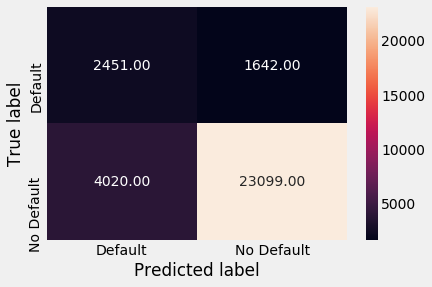

In [54]:
draw_cm( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )   # correct 0 is sensitivity and correct is specificity

In [67]:
accuracy_knn=metrics.accuracy_score( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)*100
accuracy_knn='{:.2f}'.format(accuracy_knn)
print( 'Total Accuracy : ',accuracy_knn)
recall_knn=metrics.recall_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('recall',recall_knn)
Precision_knn=metrics.precision_score(final_model_predictions_knn.Actual, final_model_predictions_knn.predictions )
print('Precision',Precision_knn)

Total Accuracy :  81.86
recall 0.8517644455916517
Precision 0.9336324319954731


In [68]:
cm2 = metrics.confusion_matrix( final_model_predictions_knn.Actual, final_model_predictions_knn.predictions)

sensitivity = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', round( sensitivity, 2) )

specificity = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', round( specificity, 2 ) )

Sensitivity :  0.6
Specificity :  0.85


In [69]:
rows_knn=pd.DataFrame({"Algorithm":['Random Forest','K-Nearest Neighbors Algorithm'],"Accuracy":[accuracy_RF,accuracy_knn],"Recall":[recall_RF,recall_knn],"Precision ":[precision_RF,Precision_knn]})
rows_knn

,Algorithm,Accuracy,Recall,Precision
0,Random Forest,93.00,0.983185,0.934986
1,K-Nearest Neighbors Algorithm,81.86,0.851764,0.933632


## Linear Regression
#### .

In [57]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [59]:
lin_reg.fit(X_train_lr,y_train_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
y_pred_lr=lin_reg.predict(X_test_lr)

In [61]:
y_pred_lr

array([0.78920684, 0.89366029, 0.79402842, ..., 0.88336906, 0.87681041,
       0.89470286])

In [62]:
y_pred_lrr=y_pred_lr.round()

In [63]:
final_model_predictions_lr = pd.DataFrame({'Actual':y_test_lr, 'predictions':y_pred_lrr})

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_lr, y_pred_lrr))
print(classification_report(y_test_lr, y_pred_lrr))

[[    0  4093     0]
 [    0 27117     2]
 [    0     0     0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4093
         1.0       0.87      1.00      0.93     27119
         2.0       0.00      0.00      0.00         0

    accuracy                           0.87     31212
   macro avg       0.29      0.33      0.31     31212
weighted avg       0.75      0.87      0.81     31212



In [65]:
accuracy_lr=metrics.accuracy_score( final_model_predictions_lr.Actual, final_model_predictions_lr.predictions  )*100
accuracy_lr='{:.2f}'.format(accuracy_lr)
print( 'Total Accuracy : ',accuracy_lr)
recall_lr=metrics.recall_score(final_model_predictions_lr.Actual, final_model_predictions_lr.predictions,average='micro' )
print('recall',recall_lr)
Precision_lr=metrics.precision_score(final_model_predictions_lr.Actual, final_model_predictions_lr.predictions,average='micro' )
print('Precision',Precision_lr)

Total Accuracy :  86.88
recall 0.868800461361015
Precision 0.868800461361015


In [70]:
rows_knn=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr],"Recall":[recall_RF,recall_knn,recall_lr],"Precision ":[precision_RF,Precision_knn,Precision_lr]},index=["Random Forest","KNN","Linear Regression"])
rows_knn

,Accuracy,Recall,Precision
Random Forest,93.00,0.983185,0.934986
KNN,81.86,0.851764,0.933632
Linear Regression,86.88,0.868800,0.868800


## Decision Tree Classifier 
#### .

In [71]:
# import the regressor 
from sklearn.tree import DecisionTreeClassifier 

In [72]:
# create a regressor object 
decision_Tree_Classifier = DecisionTreeClassifier (random_state = 0) 



In [73]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [74]:
decision_Tree_Classifier.fit(X_train_DT, y_train_DT) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [75]:
# predicting a new value 
  
# test the output by changing values, like 3750 
y_pred_DT = decision_Tree_Classifier.predict(X_test_DT) 
  

In [76]:
print(y_pred_DT)

[1 1 1 ... 1 1 1]


In [77]:
final_model_predictions_DT = pd.DataFrame({'Actual':y_test_DT, 'predictions':y_pred_DT})

In [78]:
final_model_predictions_DT.head()

,Actual,predictions
135079,1,1
151904,1,1
173677,1,1
169196,1,1
148161,1,1


In [79]:
# how did our model perform?
count_misclassified = (y_test_DT != y_pred_DT).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_DT = np.round(metrics.accuracy_score(y_test_DT, y_pred_DT),1)*100
print( 'Total Accuracy : ',accuracy_DT)

Misclassified samples: 3556
Total Accuracy :  90.0


In [80]:
print(confusion_matrix(y_test_DT, y_pred_DT))
print(classification_report(y_test_DT, y_pred_DT))

[[ 2411  1682]
 [ 1874 25245]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.58      4093
           1       0.94      0.93      0.93     27119

    accuracy                           0.89     31212
   macro avg       0.75      0.76      0.75     31212
weighted avg       0.89      0.89      0.89     31212



In [81]:
accuracy_DT=np.round( metrics.accuracy_score( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions  ),1)*100
accuracy_DT='{:.2f}'.format(accuracy_DT)
print( 'Total Accuracy : ',accuracy_DT)
recall_DT=metrics.recall_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('recall',recall_DT)
Precision_DT=metrics.precision_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='micro' )
print('Precision',Precision_DT)

Total Accuracy :  90.00
recall 0.8860694604639241
Precision 0.8860694604639241


In [82]:
table_DT=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_DT],
                       "Recall":[recall_RF,recall_knn,recall_lr,recall_DT],
                       "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_DT]},
                      index=["Random Forest","KNN","Linear Regression","Decision Tree Classifier"])
table_DT

,Accuracy,Recall,Precision
Random Forest,93.00,0.983185,0.934986
KNN,81.86,0.851764,0.933632
Linear Regression,86.88,0.868800,0.868800
Decision Tree Classifier,90.00,0.886069,0.886069


## Support Vector Classifier 
#### .

In [83]:
x_svm=X.head(500)
y_svm=Y.head(500)
#support vector classifier works slow for large data sets. hence it is trimmed

In [84]:
X_train_SVC, X_test_SVC, y_train_SVC, y_test_SVC = train_test_split( x_svm, y_svm, test_size = 0.3, random_state = 100)

In [85]:
from sklearn.svm import SVC # "Support Vector Classifier" 
clfsvm = SVC(kernel='linear') 

In [88]:
# fitting x samples and y classes 
clfsvm.fit(X_train_SVC,y_train_SVC) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
y_pred_SVC=clfsvm.predict(X_test_SVC)

In [90]:
final_model_predictions_SVC = pd.DataFrame({'Actual':y_test_SVC, 'predictions':y_pred_SVC})

In [91]:
# how did our model perform?
count_misclassified = (y_test_SVC != y_pred_SVC).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_SVC = metrics.accuracy_score(y_test_SVC, y_pred_SVC)
print('Accuracy: {:.2f}'.format(accuracy_SVC))

Misclassified samples: 23
Accuracy: 0.85


In [92]:
print(confusion_matrix(y_test_SVC, y_pred_SVC))
print(classification_report(y_test_SVC, y_pred_SVC))
print("-----------------------------------------------------------------------------------------------------------------------")

print("-----------------------------------------------------------------------------------------------------------------------")
accuracy_SVC=metrics.accuracy_score( final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions  )*100
accuracy_SVC='{:.2f}'.format(accuracy_SVC)
print( 'Total Accuracy : ',accuracy_SVC)
recall_SVC=metrics.recall_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('recall',recall_SVC)
Precision_SVC=metrics.precision_score(final_model_predictions_SVC.Actual, final_model_predictions_SVC.predictions,average='micro' )
print('Precision',Precision_SVC)

[[  0  23]
 [  0 127]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.85      1.00      0.92       127

    accuracy                           0.85       150
   macro avg       0.42      0.50      0.46       150
weighted avg       0.72      0.85      0.78       150

-----------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  84.67
recall 0.8466666666666667
Precision 0.8466666666666667


In [93]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_DT,accuracy_SVC],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_DT,recall_SVC],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_DT,Precision_SVC]},
                   index=["Random Forest","KNN","Linear Regression","Decision Tree Classifier","Support Vector Classifier"])
table

,Accuracy,Recall,Precision
Random Forest,93.00,0.983185,0.934986
KNN,81.86,0.851764,0.933632
Linear Regression,86.88,0.868800,0.868800
Decision Tree Classifier,90.00,0.886069,0.886069
Support Vector Classifier,84.67,0.846667,0.846667


## Logistic Regression
#### .

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [96]:
logmodel = LogisticRegression()
logmodel.fit(X_train_LR, y_train_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
predictions_LR = logmodel.predict(X_test_LR)

In [98]:
predictions_LR

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [99]:
final_model_predictions_LR = pd.DataFrame({'Actual':y_test_LR, 'predictions':predictions_LR})

In [100]:
count_misclassified = (y_test_LR != predictions_LR).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test_LR, predictions_LR)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 4093
Accuracy: 0.87


In [101]:
print(confusion_matrix(y_test_LR, predictions_LR))
print(classification_report(y_test_LR, predictions_LR))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")
accuracy_LR=np.round(metrics.accuracy_score( final_model_predictions_LR.Actual, final_model_predictions_LR.predictions ),2 )*100
accuracy_LR='{:.2f}'.format(accuracy_LR)
print( 'Total Accuracy : ',accuracy_LR)
recall_LR=metrics.recall_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='micro' )
print('Precision',Precision_LR)

[[    0  4093]
 [    0 27119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4093
           1       0.87      1.00      0.93     27119

    accuracy                           0.87     31212
   macro avg       0.43      0.50      0.46     31212
weighted avg       0.75      0.87      0.81     31212

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  87.00
recall 0.8688645392797641
Precision 0.8688645392797641


In [102]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_DT,accuracy_SVC,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_DT,recall_SVC,recall_LR],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_DT,Precision_SVC,Precision_LR]},
                   index=["Random Forest","KNN","Linear Regression","Decision Tree Classifier","Support Vector Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
Random Forest,93.00,0.983185,0.934986
KNN,81.86,0.851764,0.933632
Linear Regression,86.88,0.868800,0.868800
Decision Tree Classifier,90.00,0.886069,0.886069
Support Vector Classifier,84.67,0.846667,0.846667
Logistic Regression,87.00,0.868865,0.868865


## Linear Discriminant Analysis
#### .

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [104]:
clf_LDA = LinearDiscriminantAnalysis()

In [105]:
X_train_LDA, X_test_LDA, y_train_LDA, y_test_LDA = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [106]:
clf_LDA.fit(X_train_LDA, y_train_LDA)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [107]:
predictions_LDA = clf_LDA.predict(X_test_LDA)

In [108]:
final_model_predictions_LDA = pd.DataFrame({'Actual':y_test_LDA, 'predictions':predictions_LDA})

In [109]:
count_misclassified = (y_test_LDA != predictions_LDA).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_LDA = metrics.accuracy_score(y_test_LDA, predictions_LDA)
accuracy_LDA='{:.4f}'.format(accuracy)
accuracy_LDA = float(accuracy_LDA)*100

Misclassified samples: 4105


In [110]:
print(confusion_matrix(y_test_LDA, predictions_LDA))
print(classification_report(y_test_LDA, predictions_LDA))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")

print( 'Total Accuracy : ',accuracy_LDA)
recall_LDA=metrics.recall_score(final_model_predictions_LDA.Actual, final_model_predictions_LDA.predictions,average='micro' )
print('recall',recall_LDA)
Precision_LDA=metrics.precision_score(final_model_predictions_LDA.Actual, final_model_predictions_LDA.predictions,average='micro' )
print('Precision',Precision_LDA)


[[   24  4069]
 [   36 27083]]
              precision    recall  f1-score   support

           0       0.40      0.01      0.01      4093
           1       0.87      1.00      0.93     27119

    accuracy                           0.87     31212
   macro avg       0.63      0.50      0.47     31212
weighted avg       0.81      0.87      0.81     31212

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  86.89
recall 0.868480071767269
Precision 0.868480071767269


In [111]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_LDA,accuracy_DT,accuracy_SVC,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_LDA,recall_DT,recall_SVC,recall_LR,],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_LDA,Precision_DT,Precision_SVC,Precision_LR]},
                   index=["Random Forest","K-Nearest Neighbors Algorithm","Linear Regression","Linear Discriminant Analysis","Decision Tree Classifier","Support Vector Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
Random Forest,93.00,0.983185,0.934986
K-Nearest Neighbors Algorithm,81.86,0.851764,0.933632
Linear Regression,86.88,0.868800,0.868800
Linear Discriminant Analysis,86.89,0.868480,0.868480
Decision Tree Classifier,90.00,0.886069,0.886069
Support Vector Classifier,84.67,0.846667,0.846667
Logistic Regression,87.00,0.868865,0.868865


## Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [114]:
gnb = GaussianNB()

In [115]:
gnb.fit(X_train_NB, y_train_NB)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
y_pred_NB=gnb.predict(X_test_NB)

In [117]:
final_model_predictions_NB = pd.DataFrame({'Actual':y_test_NB, 'predictions':y_pred_NB})

In [118]:
count_misclassified = (y_test_NB != y_pred_NB).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_NB = metrics.accuracy_score(y_test_NB, y_pred_NB)
accuracy_NB='{:.3f}'.format(accuracy_NB)
accuracy_NB = float(accuracy_NB)*100

Misclassified samples: 4093


In [119]:
print(confusion_matrix(y_test_NB, y_pred_NB))
print(classification_report(y_test_NB, y_pred_NB))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")
accuracy_NB='{:.2f}'.format(accuracy_NB)
print( 'Total Accuracy : ',accuracy_NB)
recall_NB=metrics.recall_score(final_model_predictions_NB.Actual, final_model_predictions_NB.predictions,average='micro' )
print('recall',recall_NB)
Precision_NB=metrics.precision_score(final_model_predictions_NB.Actual, final_model_predictions_NB.predictions,average='micro' )
print('Precision',Precision_NB)

[[    0  4093]
 [    0 27119]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4093
           1       0.87      1.00      0.93     27119

    accuracy                           0.87     31212
   macro avg       0.43      0.50      0.46     31212
weighted avg       0.75      0.87      0.81     31212

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  86.90
recall 0.8688645392797641
Precision 0.8688645392797641


In [120]:
table=pd.DataFrame({"Accuracy":[accuracy_RF,accuracy_knn,accuracy_lr,accuracy_LDA,accuracy_DT,accuracy_NB,accuracy_SVC,accuracy_LR],
                    "Recall":[recall_RF,recall_knn,recall_lr,recall_LDA,recall_DT,recall_NB,recall_SVC,recall_LR,],
                    "Precision ":[precision_RF,Precision_knn,Precision_lr,Precision_LDA,Precision_DT,Precision_NB,Precision_SVC,Precision_LR]},
                   index=["Random Forest","K-Nearest Neighbors Algorithm","Linear Regression","Linear Discriminant Analysis","Decision Tree Classifier","Naive Bayes","Support Vector Classifier","Logistic Regression"])
table

,Accuracy,Recall,Precision
Random Forest,93.00,0.983185,0.934986
K-Nearest Neighbors Algorithm,81.86,0.851764,0.933632
Linear Regression,86.88,0.868800,0.868800
Linear Discriminant Analysis,86.89,0.868480,0.868480
Decision Tree Classifier,90.00,0.886069,0.886069
Naive Bayes,86.90,0.868865,0.868865
Support Vector Classifier,84.67,0.846667,0.846667
Logistic Regression,87.00,0.868865,0.868865
